# Example Notebook for BHPTNRSur2dq1e3

This notebook shows how to use the BHPTNRSur2dq1e3 model. This model was trained on point-particle black hole perturbation theory (BHPT) waveforms and calibrated to NR in the comparable mass ratio regime. 

For more information please see [here](https://bhptoolkit.org/BHPTNRSurrogate/).


# Lesson 1: Setup
 
1. You should now have the programs git and Jupyter as well as the Python packages scipy and h5py
2. clone the BHPTSurrogate repo

```shell
>>> git clone https://github.com/BlackHolePerturbationToolkit/BHPTNRSurrogate.git
```

3. Download the h5 file using the following public link and move it to ```BHPTNRSurrogate/data/```

```
https://www.dropbox.com/scl/fo/hyli37hr8c8wn8iq3p85z/AExZRxZrY6HX5756IdAVeGU?rlkey=n06hodoapvlrx0b6lxfrfbst6
```

Alternatively, the code will automatically do it for you. (Update later)

In [4]:
!wget -O ../../data/BHPTNRSur2dq1e3.h5 https://www.dropbox.com/scl/fo/hyli37hr8c8wn8iq3p85z/AExZRxZrY6HX5756IdAVeGU?rlkey=n06hodoapvlrx0b6lxfrfbst6

--2024-05-15 16:49:19--  https://www.dropbox.com/scl/fo/hyli37hr8c8wn8iq3p85z/AExZRxZrY6HX5756IdAVeGU?rlkey=n06hodoapvlrx0b6lxfrfbst6
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc26f428153a1ef7d5f854d99c40.dl.dropboxusercontent.com/zip_download_get/B2XEwa9BEuIlZQTghD93FrLQM_6GpWPntwzWvWuuzR8ng5Qp9sbQmE6QtHPS_mlM1ll8gL9ynk_F57LGk-rI8nnmxdQFo_YVG5MDRTk_Fw2amg# [following]
--2024-05-15 16:49:19--  https://uc26f428153a1ef7d5f854d99c40.dl.dropboxusercontent.com/zip_download_get/B2XEwa9BEuIlZQTghD93FrLQM_6GpWPntwzWvWuuzR8ng5Qp9sbQmE6QtHPS_mlM1ll8gL9ynk_F57LGk-rI8nnmxdQFo_YVG5MDRTk_Fw2amg
Resolving uc26f428153a1ef7d5f854d99c40.dl.dropboxusercontent.com (uc26f428153a1ef7d5f854d99c40.dl.dropboxusercontent.com)... 162.125.4.15, 2620:100:6019:15::a27d:40f
Connecting to uc26f428153a1ef7d5f854d99c40.dl.dropbo

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

# provide the path to the BHPTNRSurrogate directory
#PATH_TO_BHPTNRSur = "/work/pi_gkhanna_uri_edu/riteshbachhar_uri_edu/Research/Surrogate/BHPTNRSurrogate"
PATH_TO_BHPTNRSur = "/home/balzani57/Repo/GitRepos/Codes/BHPTNRSurrogate-katie/BHPTNRSurrogate/"
sys.path.append(PATH_TO_BHPTNRSur+"/surrogates")

import BHPTNRSur2dq1e3 as bhptsur

/home/balzani57/pool/anaconda3/envs/py311-gw-5-2024/lib/python3.11/site-packages/gwtools/const.py:52: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


lal.MSUN_SI != Msun
SURROGATE LOADED


In [2]:
# print out the documentation
help(bhptsur.generate_surrogate)

Help on function generate_surrogate in module BHPTNRSur2dq1e3:

generate_surrogate(q, spin1=0.0, spin2=None, ecc=None, ano=None, modes=None, M_tot=None, dist_mpc=None, orb_phase=None, inclination=None, neg_modes=False, mode_sum=False, lmax=4, calibrated=True)
    ## -------------------------------------------------------------------------- ##
    ## general overview
    ## -------------------------------------------------------------------------- ##
    
    Description : wrapper to generate BHPT surrogate waveforms
    
    Input
    =====
    q: mass ratio (with q >=1)
    
    chi1: dimensionless spin of the primary black hole where -1 <= chi1 <= 1
          Default: None
    
    chi2: dimensionless spin of the secondary black hole where -1 <= chi2 <= 1
          Default: None
          Not Implemented in any model so far
    
    ecc: eccentricity / Default: None
         Not Implemented in any model so far
    
    ano: mean anomaly / Default: None
         Not Implemented in any

# Lesson 2: Calling the model

Here we showcase a few different ways of calling the model

### 1. Generate uncalibrated waveforms (only 0PA effect) in geometric units

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


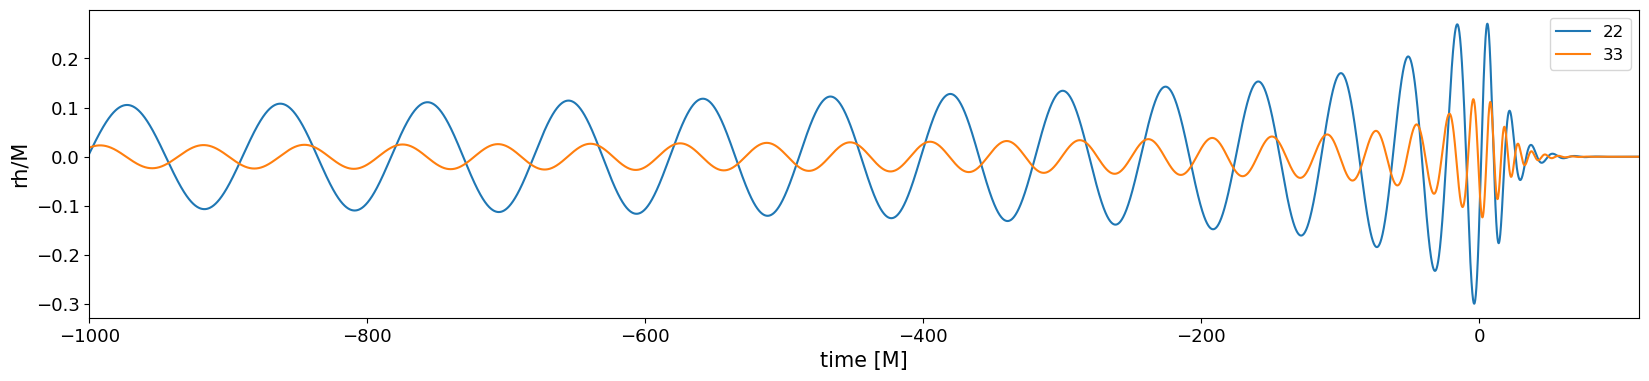

In [3]:
tsur, hsur = bhptsur.generate_surrogate(q=5.0, spin1=0.2, calibrated=False)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlim(-1000,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 2. Generate NR-calibrated waveforms in geometric units

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


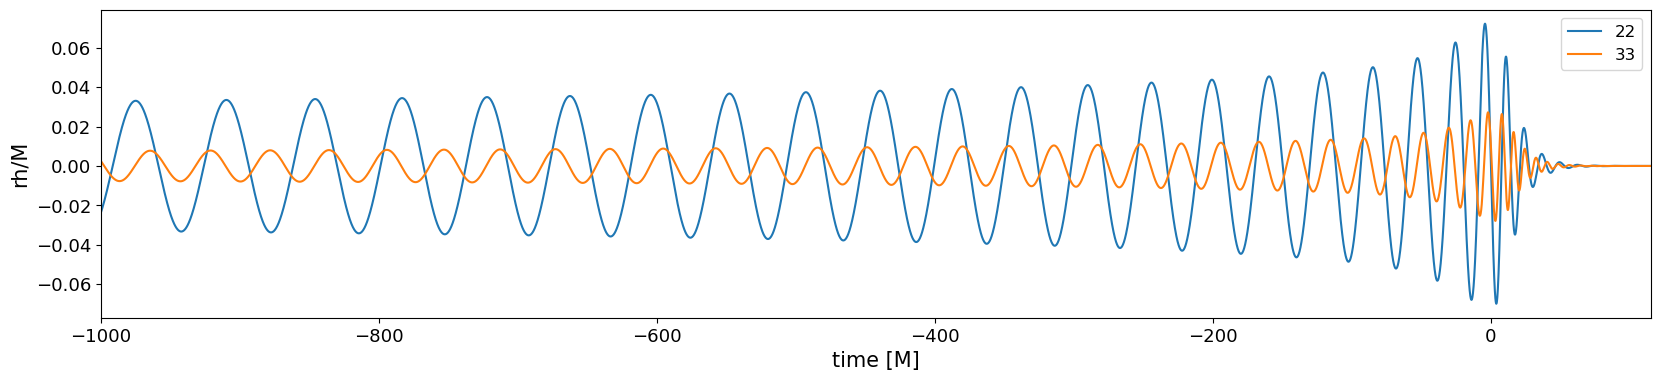

In [4]:
tsur, hsur = bhptsur.generate_surrogate(q=20, spin1=0.5)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlim(-1000,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


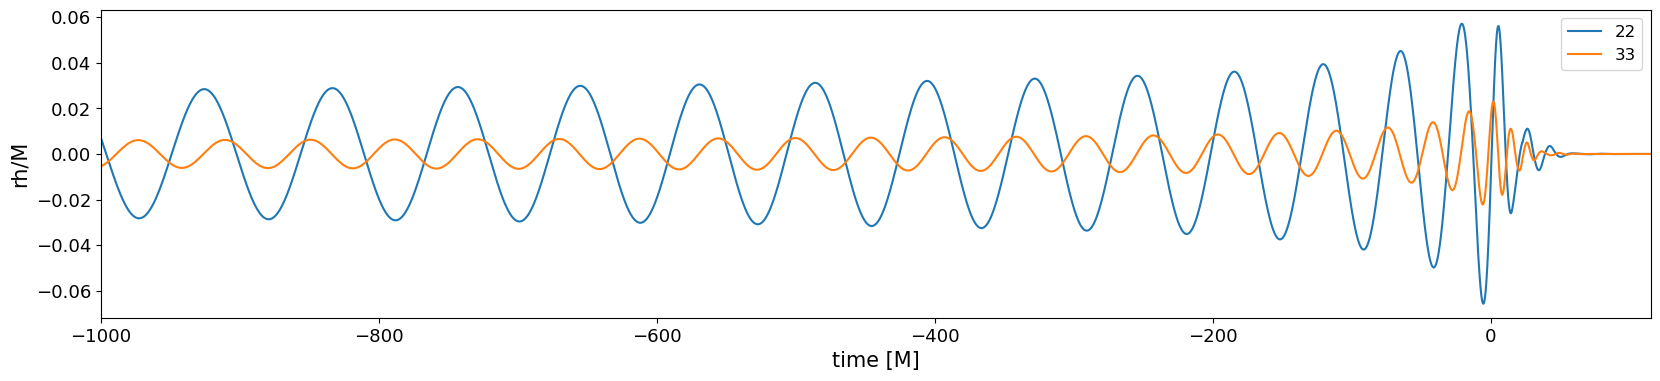

In [5]:
tsur, hsur = bhptsur.generate_surrogate(q=20, spin1=-0.5)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlim(-1000,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 3. Generate (NR calibrated) waveform modes in Physical (SI) units

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


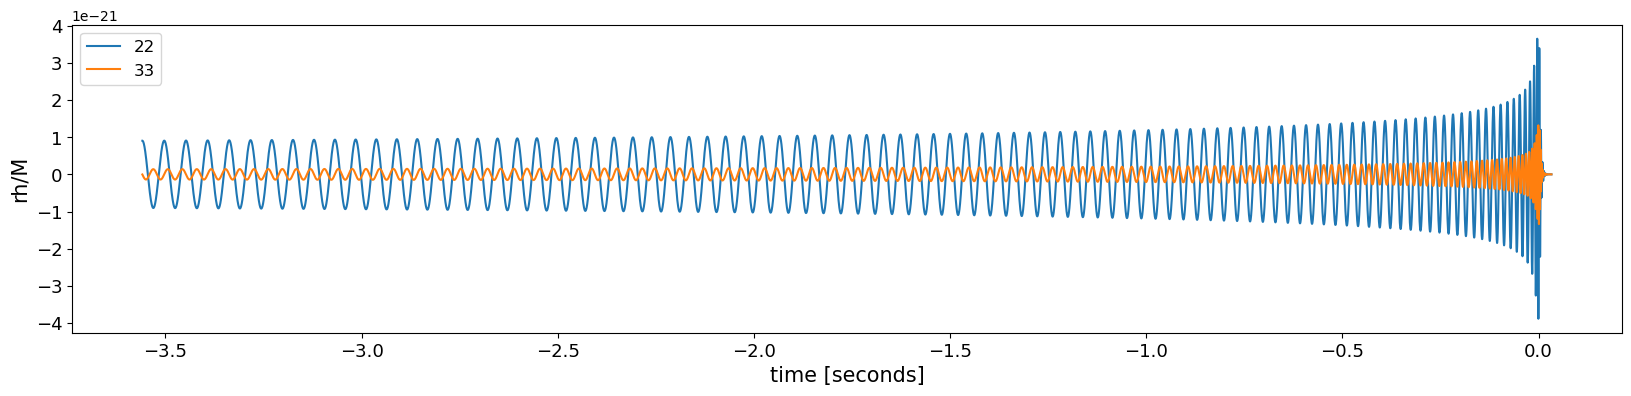

In [6]:
tsur, hsur = bhptsur.generate_surrogate(q=10, spin1=0.3, M_tot=60, dist_mpc=100)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [seconds]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 4. Generate (NR calibrated) waveform modes in Physical (SI) units evaluated at point in the sky

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


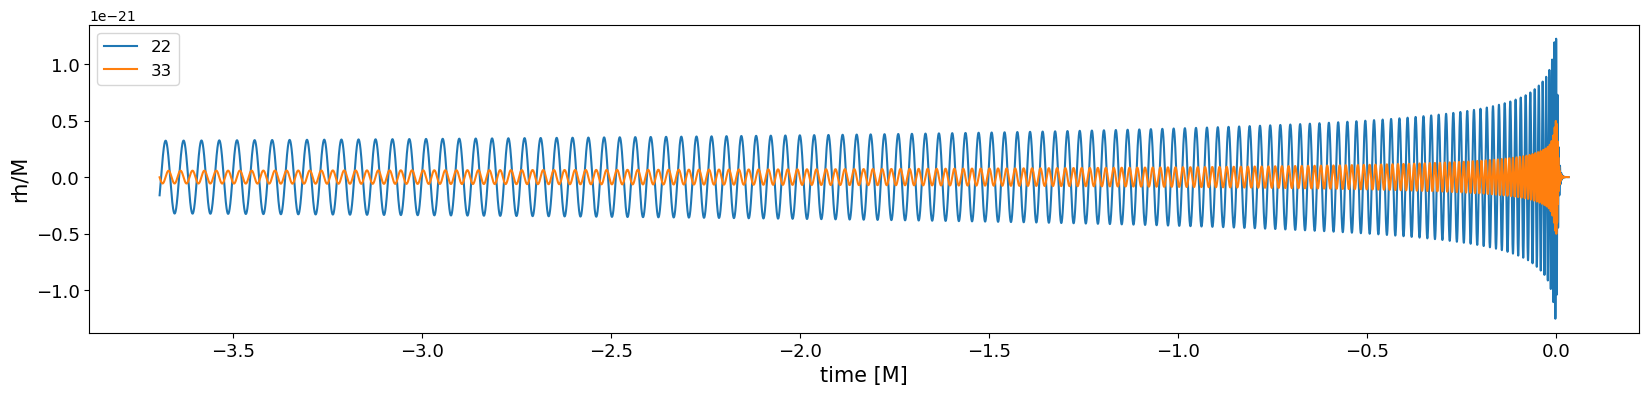

In [7]:
tsur, hsur = bhptsur.generate_surrogate(q=15, spin1=0.7, M_tot=60, dist_mpc=100, orb_phase=np.pi/3, inclination=np.pi/4)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

#### 4.1. Check for phase=0, inclination=0, 33 mode is zero

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


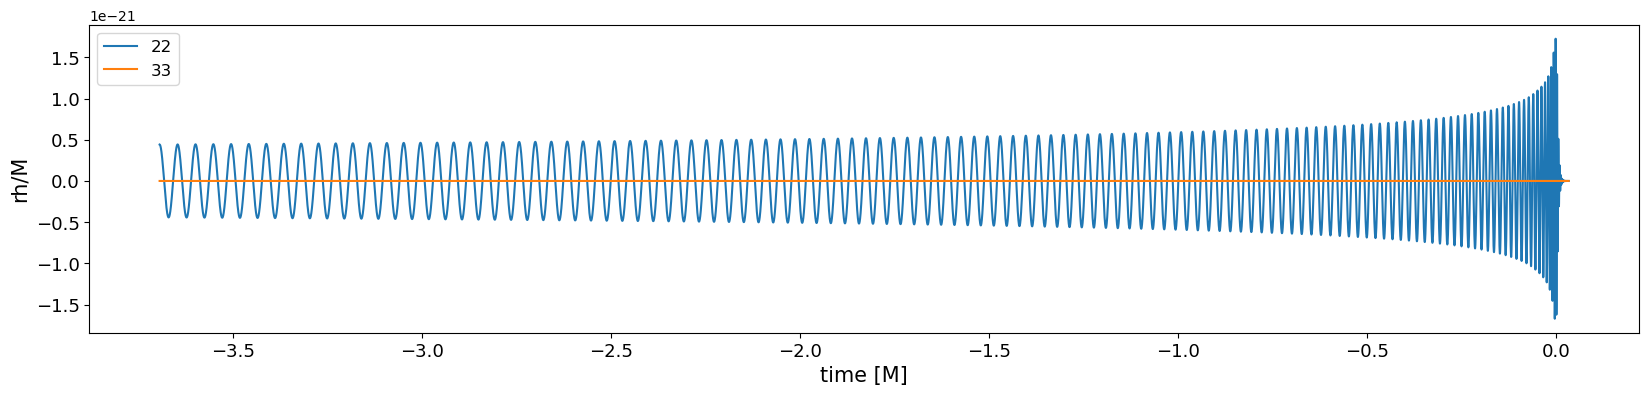

In [8]:
tsur, hsur = bhptsur.generate_surrogate(q=15, spin1=0.7, M_tot=60, dist_mpc=100, orb_phase=0.0, inclination=0.0)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 5. Generate (NR calibrated) waveform in Physical (SI) units on a sphere for a given set of modes

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


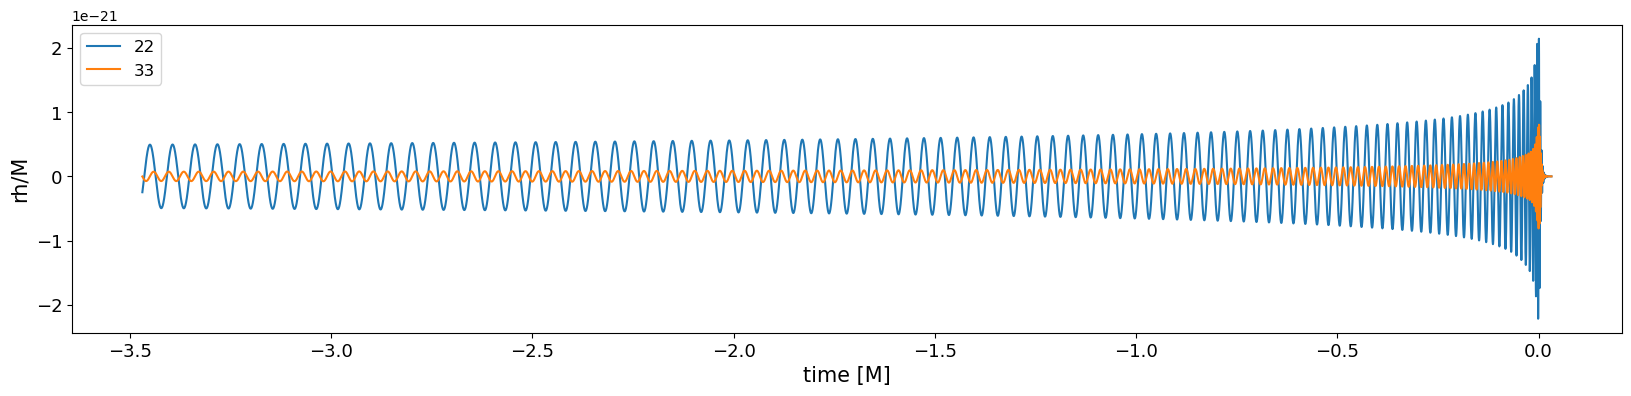

In [9]:
# Note : (2,2) mode should always be in the mode_list; otherwise it will throw errors
modes = [(2,2),(3,3),(4,4),(5,5)]

tsur, hsur = bhptsur.generate_surrogate(q=8, spin1=0.7, M_tot=60, dist_mpc=100, orb_phase=np.pi/3, inclination=np.pi/4)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3), (4, 2), (4, 3), (4, 4)])


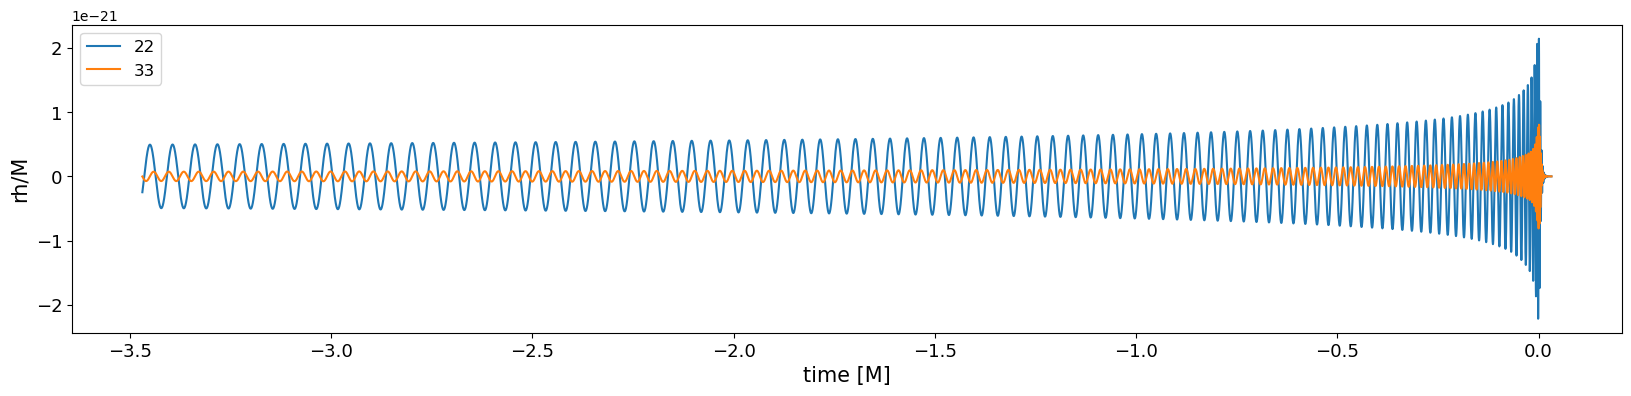

In [10]:
# Note : (2,2) mode should always be in the mode_list; otherwise it will throw errors
modes = [(2,2),(3,3),(4,4),(5,5)]

tsur, hsur = bhptsur.generate_surrogate(q=8, spin1=0.7, M_tot=60, dist_mpc=100, orb_phase=np.pi/3, inclination=np.pi/4)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 6. Generate (NR calibrated) waveform in Physical (SI) units on a sphere for possible modes upto l=3

dict_keys([(2, 2), (2, 1), (3, 1), (3, 2), (3, 3)])


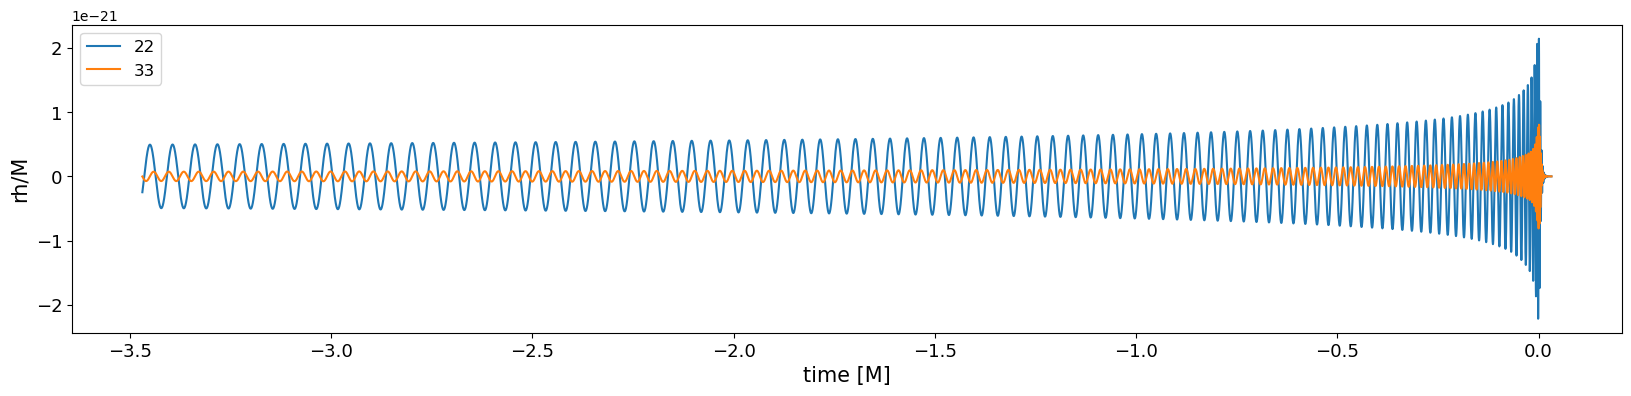

In [11]:
lmax = 3 # Note default value of lmax is 5; because we have NR calibrated modes up to l=5
tsur, hsur = bhptsur.generate_surrogate(q=8, spin1=0.7, M_tot=60, dist_mpc=100, orb_phase=np.pi/3, inclination=np.pi/4, lmax=3)

print(hsur.keys())

plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur[(2,2)]), '-', label='22')
plt.plot(tsur, np.real(hsur[(3,3)]), '-', label='33')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

### 7. Generate mode-summed (NR calibrated) waveform in Physical (SI) units on a sphere for possible modes upto l=3

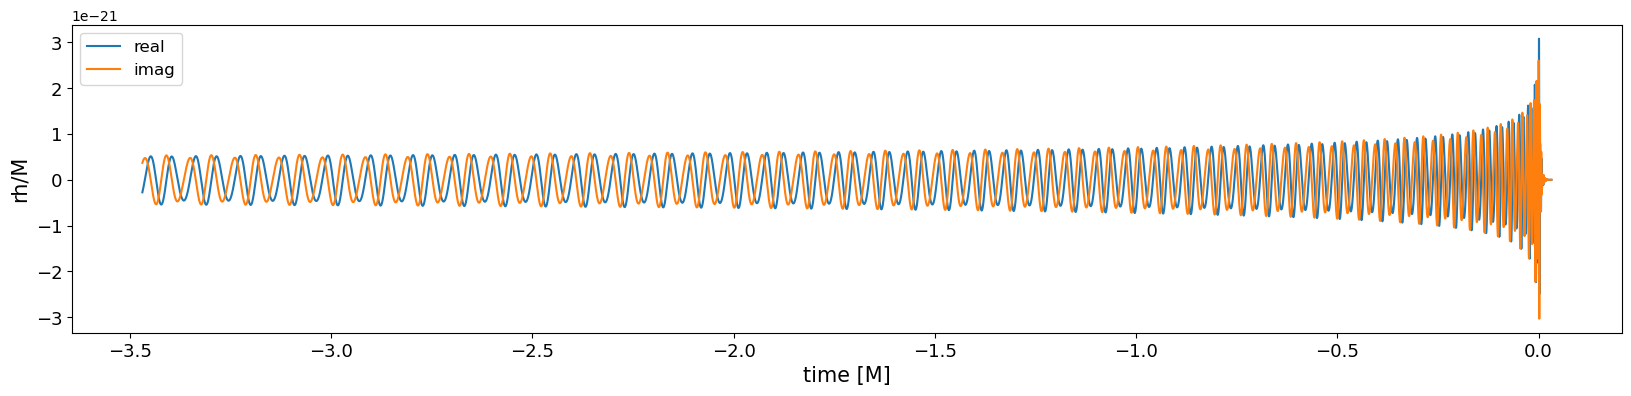

In [12]:
lmax = 3 # Note default value of lmax is 5; because we have NR calibrated modes up to l=5
tsur, hsur = bhptsur.generate_surrogate(q=8, spin1=0.7, M_tot=60, dist_mpc=100, orb_phase=np.pi/3, inclination=np.pi/4, lmax=3, mode_sum=True)


plt.figure(figsize=(20,4))
plt.plot(tsur, np.real(hsur), '-', label='real')
plt.plot(tsur, np.imag(hsur), '-', label='imag')
plt.xlabel('time [M]', fontsize=15)
plt.ylabel('rh/M', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)
plt.show()

# Lesson 4: Reproducing results from the paper

Here we reproduce a few results from the arXiv paper

### 1. Inspect the BHPTNRSur2dq1e4 model-calibration parameters

By default, the BHPTNRSurrogate package will return rescaled waveform modes,
$$
\begin{align}
h^{\ell,m}_{\tt S, \alpha,\beta}(t ; q)= {\alpha_{\ell}} h^{\ell,m}_{\tt S}\left( t \beta;q \right) \,,
\end{align}
$$
where the calibration parameters, $\alpha_{\ell}(q, \chi_1)$ and $\beta(q, \chi_1)$, are tuned to NR simulations.

Lets first check that the values provided with the BHPTNRSurrogate package match the tables in the paper

In [13]:
import pprint

# Data structure layout is [A1, A2, A3, A4, B1, B2], which can be seen by 
# inspecting the input ordering of bhptsur.nrcalib.alpha_beta_BHPTNRSur2dq1e3()
pprint.pprint(bhptsur.alpha_coeffs)
print(bhptsur.beta_coeffs)

{(2, 2): array([-1.15397324,  1.48758115, -3.35617643,  4.36611547, -0.01502512,
       -0.0665036 ]),
 (3, 3): array([-2.70721357,  3.45771825, -4.26626015,  5.48741687,  0.        ,
        0.        ]),
 (4, 4): array([ -3.22349039,   2.97668803,   5.98484158, -13.090528  ,
         0.        ,   0.        ])}
[-1.21099811  1.31265337 -0.8174404  -0.07336478 -0.02433145  0.00328884]


### 2. Compare the BHPTNRSur2dq1e3 model with an [NR Surrogate model](https://link.aps.org/accepted/10.1103/PhysRevD.99.064045) called with [GWSurrogate ](https://github.com/sxs-collaboration/gwsurrogate/tree/master)

This is figure 7 from the arXiv paper

In [14]:
import gwtools as gwt
import gwsurrogate as gws
from gwtools.gwtools import minimize_norm_error_multi_mode
from gwtools.mismatch import mathcal_E_error_from_mode_dict

__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new


In [15]:
# Load the NR surrogate model
nrsur     = gws.LoadSurrogate("NRHybSur3dq8")
nrsur_q15 = gws.LoadSurrogate("NRHybSur2dq15")

Loaded NRHybSur3dq8 model
Loaded NRHybSur2dq15 model


In [23]:
nrsur_q15?

Signature:     
nrsur_q15(
    q,
    chiA0,
    chiB0,
    M=None,
    dist_mpc=None,
    f_low=None,
    f_ref=None,
    dt=None,
    df=None,
    times=None,
    freqs=None,
    mode_list=None,
    ellMax=None,
    inclination=None,
    phi_ref=0,
    precessing_opts=None,
    tidal_opts=None,
    par_dict=None,
    units='dimensionless',
    skip_param_checks=False,
    taper_end_duration=None,
)
Type:           NRHybSur2dq15
String form:    <gwsurrogate.surrogate.NRHybSur2dq15 object at 0x7c5286ac7450>
File:           ~/pool/anaconda3/envs/py311-gw-5-2024/lib/python3.11/site-packages/gwsurrogate/surrogate.py
Docstring:     
A class for the NRHybSur2dq15 surrogate model presented in
arxiv:2203.10109. 

Evaluates gravitational waveforms generated by aligned-spin binary black hole
systems. This model was built using numerical relativity (NR) waveforms that
have been hybridized using effective one body (EOB) waveforms.

This model includes the following spin-weighted spherical harmoni

In [16]:
# Mass ratio
q = 6

# Spin on BH1
spin1 = 0.6

# Evaluate the BHPTNRSur2dq1e3 model without calibration
tbhpt_raw, hbhpt_raw = bhptsur.generate_surrogate(q=q, spin1=spin1, calibrated=False)

# Evaluate the BHPTNRSur2dq1e3 model with NR calibration
tbhpt, hbhpt = bhptsur.generate_surrogate(q=q, spin1=spin1, calibrated=True)

# Evaluate the NRHybSur3dq8 model
times = np.arange(-5000.1, 130,.1)
tnr, hnr, dyn = nrsur(q, chiA0=[0, 0.0, spin1], chiB0=[0.0, 0.0, 0.0], f_low=0.005, f_ref=None, times=times)

# Requested list of modes used in the comparison
mode_list = [(2, 2), (2, 1), (3, 3), (4, 4)]

hnr = {mode: hnr[mode] for mode in mode_list}
hbhpt = {mode: hbhpt[mode] for mode in mode_list}

In [17]:
# multi-modal match
[errors_before_min, errors_after_min], [tc, phic], [common_times,h_bhpt_aligned,h_nr_aligned] = \
                            minimize_norm_error_multi_mode(tbhpt, hbhpt, tnr, hnr, mode_list=None, ell_m_match=(2,2),\
                                    t_low_adj=0,t_up_adj=0,method='nelder-mead')

In [18]:
# compute error in each mode -- These are the values CalE_{IMR} shown in each figure
modelist = [(2,2),(3,3),(4,4)]
for mode in modelist:
    tmp = gwt.mismatch.mathcal_E_error_from_mode_list(h_nr_aligned[mode],h_bhpt_aligned[mode])
    print("mode (%i, %i) error = %f"%(mode[0],mode[1], tmp))

# compute error in each mode weighted by full multi-modal norm (Eq 21; https://arxiv.org/pdf/1701.00550.pdf)
# This shows that an error of 0.026 in the (4,4) mode (see above) is alternatively understood as an 
# error of 4e-5 then we consider the full waveform in the time-domain. 
relative_mode_errors = gwt.mismatch.mathcal_E_mode_contributions_from_mode_dict(h_nr_aligned,h_bhpt_aligned)
print(relative_mode_errors)

mode (2, 2) error = 0.004173
mode (3, 3) error = 0.019799
mode (4, 4) error = 0.069016
{(2, 2): 0.004011774882503344, (2, 1): 0.0007532720771592823, (3, 3): 0.0006345651127662043, (4, 4): 0.0001993920079861351}


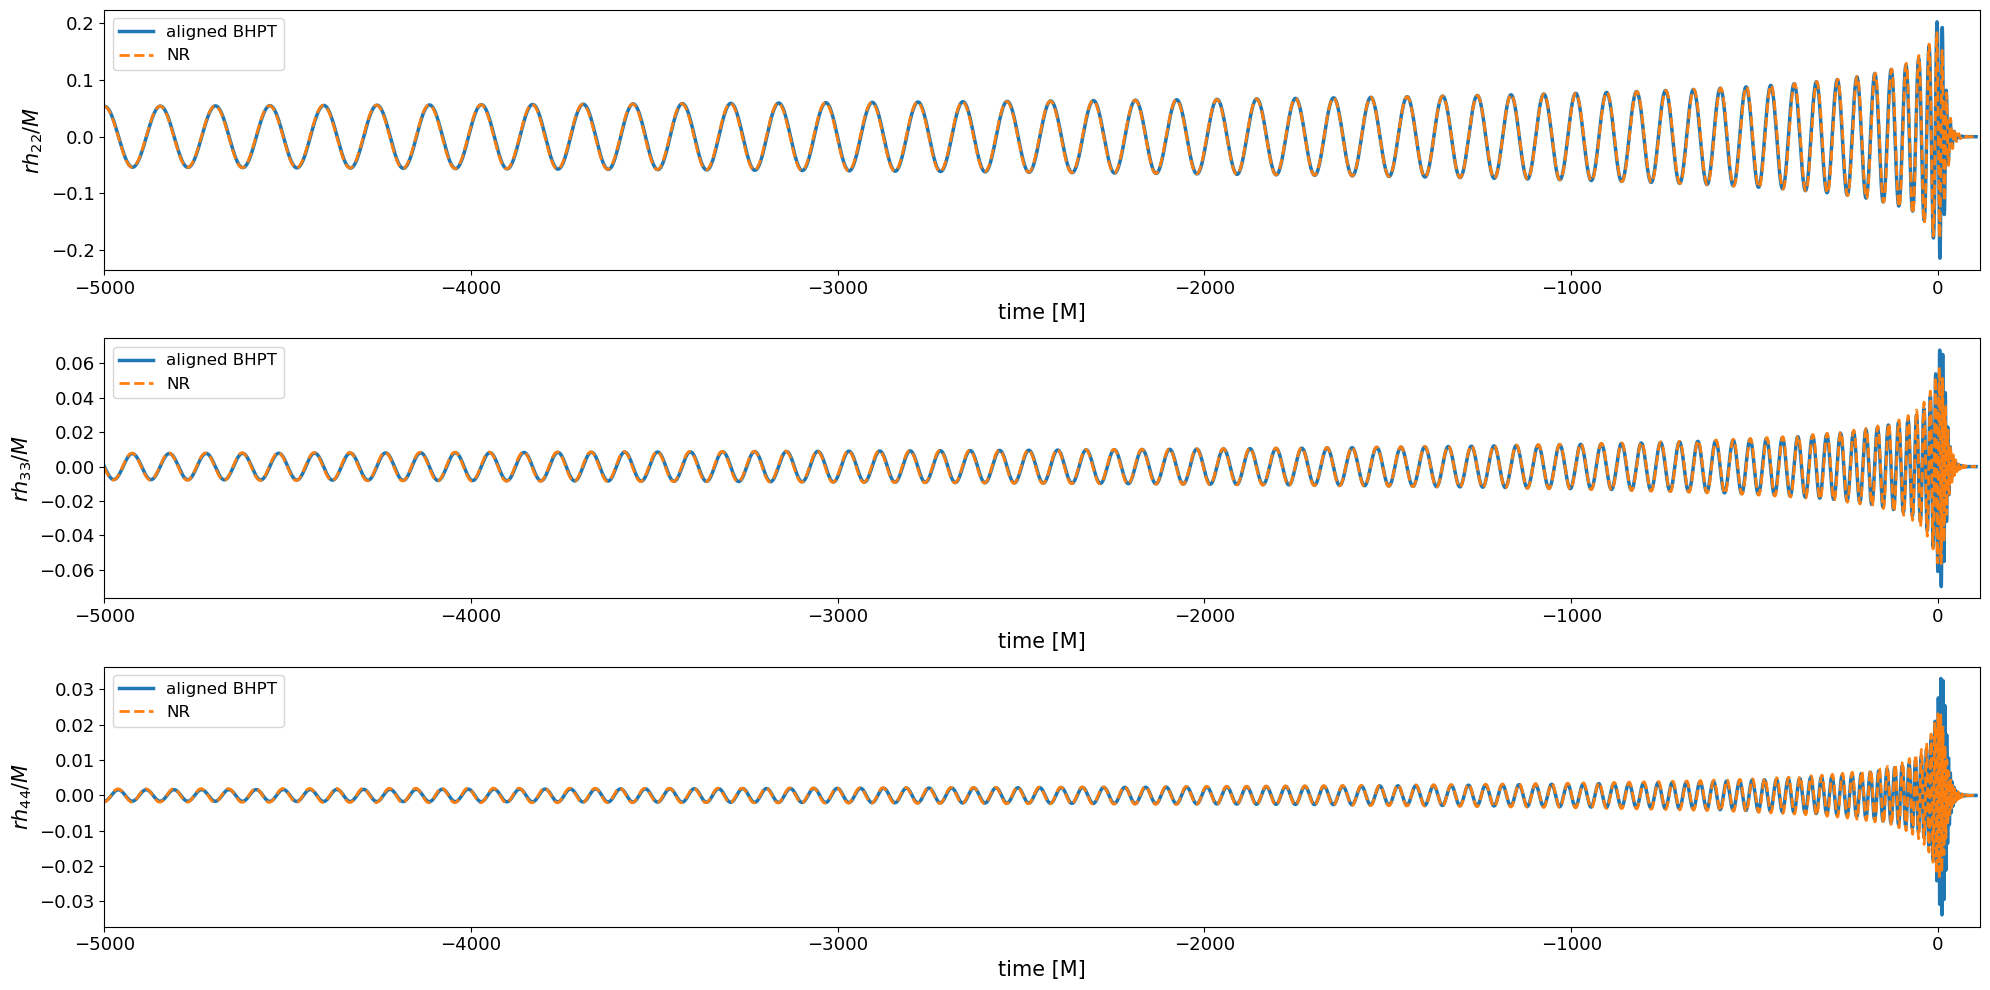

In [19]:
tstart = -5000

plt.figure(figsize=(20,10))

plt.subplot(311)
plt.plot(common_times, np.real(h_bhpt_aligned[(2,2)]), '-', lw=2.5, label='aligned BHPT')
plt.plot(common_times, np.real(h_nr_aligned[(2,2)]), '--', lw=2.0, label='NR')
plt.xlim(tstart,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel(r'$rh_{22}/M$', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)

plt.subplot(312)
plt.plot(common_times, np.real(h_bhpt_aligned[(3,3)]), '-', lw=2.5, label='aligned BHPT')
plt.plot(common_times, np.real(h_nr_aligned[(3,3)]), '--', lw=2.0, label='NR')
plt.xlim(tstart,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel(r'$rh_{33}/M$', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)

plt.subplot(313)
plt.plot(common_times, np.real(h_bhpt_aligned[(4,4)]), '-', lw=2.5, label='aligned BHPT')
plt.plot(common_times, np.real(h_nr_aligned[(4,4)]), '--', lw=2.0, label='NR')
plt.xlim(tstart,115)
plt.xlabel('time [M]', fontsize=15)
plt.ylabel(r'$rh_{44}/M$', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

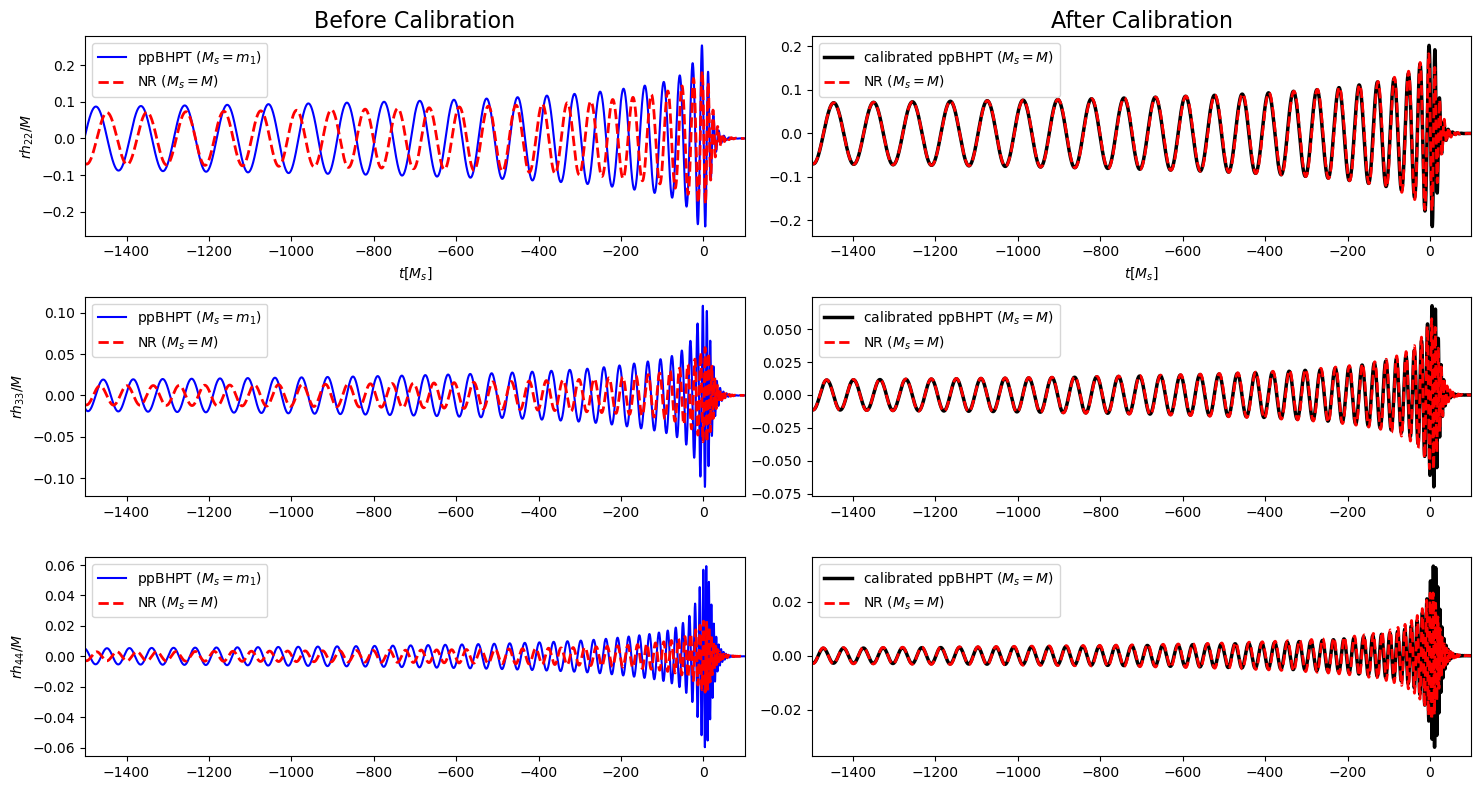

In [20]:
fig, axs = plt.subplots(3, 2, figsize=(15,8))

# Set default text sizes
plt.rcParams['axes.titlesize'] = 16  # Set title size
plt.rcParams['axes.labelsize'] = 14  # Set x and y labels size
plt.rcParams['xtick.labelsize'] = 10  # Set xtick label size
plt.rcParams['ytick.labelsize'] = 10  # Set ytick label size

modelist = [(2,2),(3,3),(4,4)]

for i, mode in enumerate(modelist):
    axs[i,0].plot(tbhpt_raw, np.real(hbhpt_raw[mode]), 'b-', lw=1.5, label=r'ppBHPT ($M_s = m_1$)')
    axs[i,0].plot(tnr, np.real(hnr[mode]), 'r--', lw=2.0, label=r'NR ($M_s = M$)')
    axs[i,0].legend()
    axs[i,0].set_xlim(-1500,100)
    mode_str = ''.join(str(e) for e in mode)
    axs[i,0].set_ylabel(rf'$rh_{{{mode_str}}}/M$',)
    
    axs[i,1].plot(common_times, np.real(h_bhpt_aligned[mode]), 'k-', lw=2.5, label=r'calibrated ppBHPT ($M_s = M$)')
    axs[i,1].plot(common_times, np.real(h_nr_aligned[mode]), 'r--', lw=2.0, label=r'NR ($M_s = M$)')
    axs[i,1].legend()
    axs[i,1].set_xlim(-1500,100)
    mode_str = ''.join(str(e) for e in mode)
    axs[i,0].set_ylabel(rf'$rh_{{{mode_str}}}/M$')

axs[0,0].set_title("Before Calibration")
axs[0,1].set_title("After Calibration")
axs[0,0].set_xlabel("$t [M_s]$")
axs[0,1].set_xlabel("$t [M_s]$")

plt.tight_layout()

### Error in (2,2) mode: NR vs BHPTNRSur2dq1e3

Figure 9.a and 9.c from arXiv xxxx.xxxxx

In [21]:
# Mass ratio
q_list = [3, 5, 8, 15]
#spin1_list = [-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
spin1_list = [-0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
#q_list = [3]
#spin1_list = [0.8]
mode = (2,2)

mathcalE_dict_IMR = {}
mathcalE_dict_inspiral = {}

# NR time grid
times = np.arange(-4200.1, 100,.1)

# NR time grid (inspiral only)
times_inspiral = np.arange(-4200.1, -50,.1)

for i, q in enumerate(q_list):
    mathcalE_list = []
    mathcalE_list_inspiral = []
    for spin1 in spin1_list:
        print(f"Mass ratio {q}, spin1 {spin1}")
        
        # Evaluate the BHPTNRSur2dq1e3 model
        tbhpt, hbhpt = bhptsur.generate_surrogate(q=q, spin1=spin1, calibrated=True)

        # Evaluate the NRHybSur3dq8 model
        #tnr, hnr = nr_surrogate(q=q, chiA=[0, 0.0, spin1], chiB=[0.0, 0.0, 0.0], time_cut_begin=-5000.1)
        #tnr, hnr, dyn = nrsur(q, chiA0=[0, 0.0, spin1], chiB0=[0.0, 0.0, 0.0], f_low=0.005, f_ref=None, times=times)
        tnr, hnr, dyn = nrsur_q15(q, chiA0=[0, 0.0, spin1], chiB0=[0.0, 0.0, 0.0], f_low=0.005, f_ref=None, times=times)

        # Evaluate the NRHybSur3dq8 model up to -50 M (50 M before merger)
        #tnr_inspiral, hnr_inspiral = nr_surrogate(q=q, chiA=[0, 0.0, spin1], chiB=[0.0, 0.0, 0.0], time_cut_begin=-5000.1, time_cut_end=-50)
        #tnr_inspiral, hnr_inspiral, dyn = nrsur(q, chiA0=[0, 0.0, spin1], chiB0=[0.0, 0.0, 0.0], f_low=0.005, f_ref=None, times=times_inspiral)
        tnr_inspiral, hnr_inspiral, dyn = nrsur_q15(q, chiA0=[0, 0.0, spin1], chiB0=[0.0, 0.0, 0.0], f_low=0.005, f_ref=None, times=times_inspiral)

        # Requested list of modes for calibration
        mode_list = [(2, 2), (2, 1), (3, 3), (4, 4)]

        hnr          = {mode: hnr[mode] for mode in mode_list}
        hnr_inspiral = {mode: hnr_inspiral[mode] for mode in mode_list}
        hbhpt        = {mode: hbhpt[mode] for mode in mode_list}

        # multi-modal match (full IMR waveform)
        [errors_before_min, errors_after_min], [tc, phic], [common_times,h_bhpt_aligned,h_nr_aligned] = \
                                minimize_norm_error_multi_mode(tbhpt, hbhpt, tnr, hnr, mode_list=None, ell_m_match=(2,2),\
                                        t_low_adj=0,t_up_adj=0,method='nelder-mead')

        # multi-modal match (full IMR waveform)
        [errors_before_min_inspiral, errors_after_min_inspiral], [tc_inspiral, phic_inspiral], [common_times_inspiral,h_bhpt_aligned_inspiral,h_nr_aligned_inspiral] = \
                                minimize_norm_error_multi_mode(tbhpt, hbhpt, tnr_inspiral, hnr_inspiral, mode_list=None, ell_m_match=(2,2),\
                                        t_low_adj=0,t_up_adj=0,method='nelder-mead')

        mathcalE_list.append(gwt.mismatch.mathcal_E_error_from_mode_list(h_nr_aligned[mode],h_bhpt_aligned[mode]))
        mathcalE_list_inspiral.append(gwt.mismatch.mathcal_E_error_from_mode_list(h_nr_aligned_inspiral[mode],h_bhpt_aligned_inspiral[mode]))
    mathcalE_dict_IMR[q]      = mathcalE_list
    mathcalE_dict_inspiral[q] = mathcalE_list_inspiral

Mass ratio 3, spin1 -0.5
Performing a physical rotation by pi...
Mass ratio 3, spin1 -0.4
Performing a physical rotation by pi...
Mass ratio 3, spin1 -0.3
Performing a physical rotation by pi...
Mass ratio 3, spin1 -0.2
Performing a physical rotation by pi...
Mass ratio 3, spin1 -0.1
Mass ratio 3, spin1 0.0
Mass ratio 3, spin1 0.1
Mass ratio 3, spin1 0.2
Mass ratio 3, spin1 0.3
Mass ratio 3, spin1 0.4
Mass ratio 3, spin1 0.5
Mass ratio 5, spin1 -0.5
Performing a physical rotation by pi...
Mass ratio 5, spin1 -0.4
Performing a physical rotation by pi...
Mass ratio 5, spin1 -0.3
Performing a physical rotation by pi...
Mass ratio 5, spin1 -0.2
Performing a physical rotation by pi...
Mass ratio 5, spin1 -0.1
Performing a physical rotation by pi...
Mass ratio 5, spin1 0.0
Performing a physical rotation by pi...
Mass ratio 5, spin1 0.1
Performing a physical rotation by pi...
Mass ratio 5, spin1 0.2
Performing a physical rotation by pi...
Mass ratio 5, spin1 0.3
Mass ratio 5, spin1 0.4
Mass r

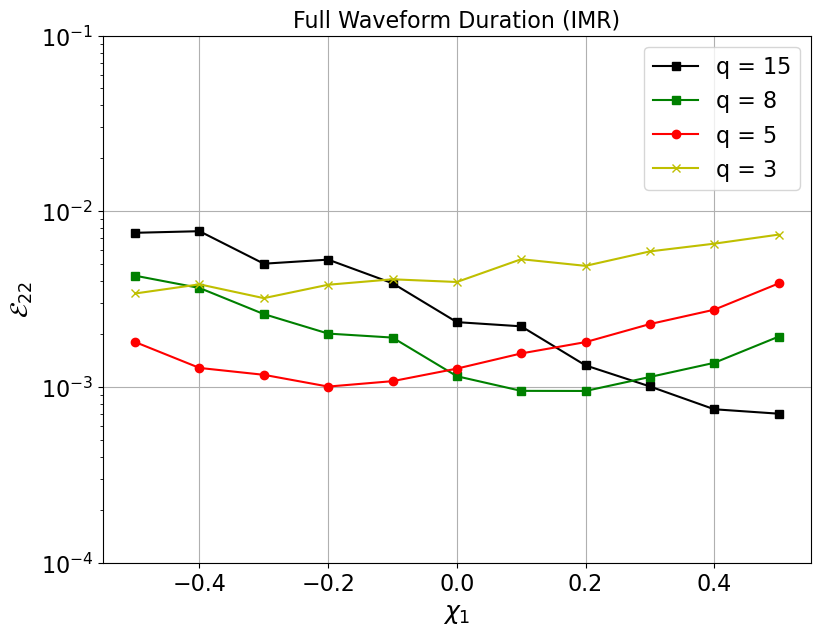

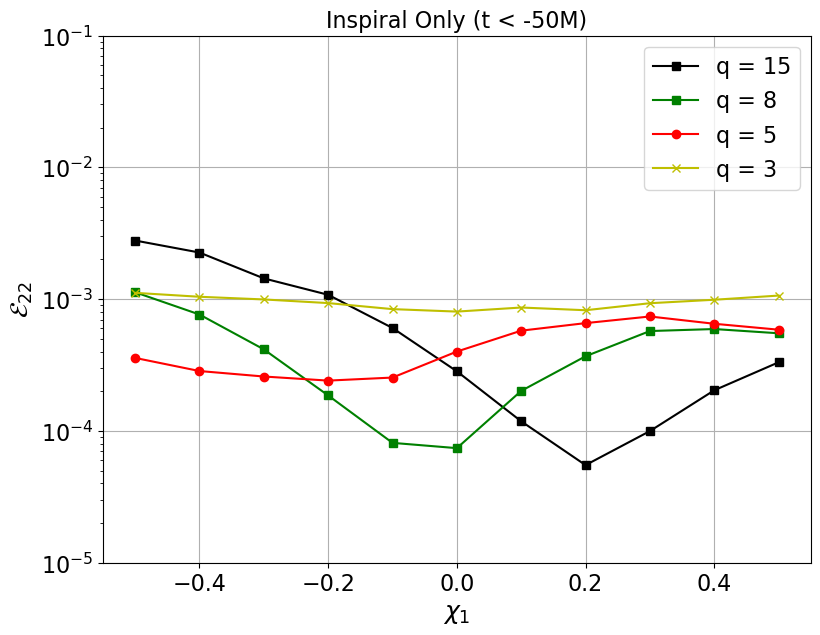

In [22]:
plt.figure(figsize=(8,6))

# Set default text sizes
plt.rcParams['axes.titlesize'] = 16  # Set title size
plt.rcParams['axes.labelsize'] = 18  # Set x and y labels size
plt.rcParams['xtick.labelsize'] = 16  # Set xtick label size
plt.rcParams['ytick.labelsize'] = 16  # Set ytick label size
plt.rcParams['legend.fontsize'] = 16


plt.semilogy(spin1_list, mathcalE_dict_IMR[15], 'k-', marker='s', label='q = 15')
plt.semilogy(spin1_list, mathcalE_dict_IMR[8], 'g-', marker='s', label='q = 8')
plt.semilogy(spin1_list, mathcalE_dict_IMR[5], 'r-', marker='o', label='q = 5')
plt.semilogy(spin1_list, mathcalE_dict_IMR[3], 'y-', marker='x', label='q = 3')

plt.legend()
plt.ylim(1e-4, 1e-1)
plt.grid()
plt.tight_layout()
plt.xlabel(r'$\chi_1$')
plt.ylabel(r'$\mathcal{E}_{22}$')
plt.title("Full Waveform Duration (IMR)")
plt.show()


plt.figure(figsize=(8,6))

# Set default text sizes
plt.rcParams['axes.titlesize'] = 16  # Set title size
plt.rcParams['axes.labelsize'] = 18  # Set x and y labels size
plt.rcParams['xtick.labelsize'] = 16  # Set xtick label size
plt.rcParams['ytick.labelsize'] = 16  # Set ytick label size
plt.rcParams['legend.fontsize'] = 16

plt.semilogy(spin1_list, mathcalE_dict_inspiral[15], 'k-', marker='s', label='q = 15')
plt.semilogy(spin1_list, mathcalE_dict_inspiral[8], 'g-', marker='s', label='q = 8')
plt.semilogy(spin1_list, mathcalE_dict_inspiral[5], 'r-', marker='o', label='q = 5')
plt.semilogy(spin1_list, mathcalE_dict_inspiral[3], 'y-', marker='x', label='q = 3')



plt.legend()
plt.ylim(1e-5, 1e-1)
plt.grid()
plt.tight_layout()
plt.xlabel(r'$\chi_1$')
plt.ylabel(r'$\mathcal{E}_{22}$')
plt.title("Inspiral Only (t < -50M)")
plt.show()

In [24]:
tbhpt, hbhpt = bhptsur.generate_surrogate(q=8, spin1=.5, calibrated=False)

In [31]:
%matplotlib notebook

In [33]:
plt.plot(tbhpt, np.abs(hbhpt[(2,2)]))

<IPython.core.display.Javascript object>

In [30]:
!conda install -y -c conda-forge ipympl

Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/balzani57/pool/anaconda3/envs/py311-gw-5-2024

  added / updated specs:
    - ipympl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.2.2   |       hbcca054_0         152 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    ipympl-0.9.4               |     pyhd8ed1ab_0         209 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         517 KB

The following NEW packages will be INSTALLED:

  ipympl             conda-forge/noarch::ipympl-0.9.4-pyhd8ed1ab_0 

The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2023.12.12~ --> conda-forge::ca-certificates-2024.2.2-hbcca054_0 
